Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import random
import scipy.stats
import datetime

In [2]:
pd.set_option("display.max_rows", 18, "display.max_columns", 18)

Preparando uma base de dados geral

In [3]:
#verificando a quantidade de dados por arquivo
rows_aluno = sum(1 for line in open('DM_ALUNO.csv')) - 1
rows_curso = sum(1 for line in open('DM_CURSO.csv')) - 1    
rows_docente = sum(1 for line in open('DM_DOCENTE.csv')) - 1   
print(rows_aluno, rows_curso, rows_docente)

11589194 35693 392036


In [4]:
#para importar um sample de um df muito grande
colunas_aluno = ['CO_IES','CO_ALUNO','TP_CATEGORIA_ADMINISTRATIVA','TP_SEXO','CO_OCDE_AREA_GERAL','CO_OCDE_AREA_ESPECIFICA','CO_OCDE_AREA_DETALHADA','CO_OCDE','CO_CURSO','NU_ANO_INGRESSO','TP_SITUACAO','NU_ANO_NASCIMENTO','NU_MES_NASCIMENTO','NU_DIA_NASCIMENTO','IN_MATRICULA', 'IN_CONCLUINTE', 'IN_APOIO_SOCIAL', 'IN_BOLSA_ESTAGIO', 'NU_ANO_INGRESSO']
n = sum(1 for line in open('DM_ALUNO.csv')) - 1
s = 1200000 
skip = sorted(random.sample(range(1, n+1), n-s))
#importação com o skip jogando fora o numero de linhas selecionadas aleatoriamente
df_aluno = pd.read_csv('DM_ALUNO.csv', sep="|", skiprows = skip, encoding = "latin1", usecols=colunas_aluno) 
df_aluno


,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,TP_SITUACAO,IN_APOIO_SOCIAL,IN_BOLSA_ESTAGIO,IN_MATRICULA,IN_CONCLUINTE,NU_ANO_INGRESSO
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,1992,9,30,2,0,NaN,1,0,2017
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,1990,2,27,2,0,NaN,1,0,2015
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,1990,1,29,2,0,NaN,1,0,2017
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,1981,1,8,2,0,NaN,1,0,2017
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,1985,3,25,2,0,NaN,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,1993,4,1,3,0,NaN,0,0,2017
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,1990,4,25,2,0,NaN,1,0,2017
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,1980,2,1,2,0,NaN,1,0,2017
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,1997,10,16,2,0,NaN,1,0,2017


In [5]:
df_aluno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   CO_IES                       1200000 non-null  int64  
 1   TP_CATEGORIA_ADMINISTRATIVA  1200000 non-null  int64  
 2   CO_CURSO                     1200000 non-null  int64  
 3   CO_OCDE_AREA_GERAL           1194272 non-null  float64
 4   CO_OCDE_AREA_ESPECIFICA      1194272 non-null  float64
 5   CO_OCDE_AREA_DETALHADA       1194272 non-null  float64
 6   CO_OCDE                      1194272 non-null  object 
 7   CO_ALUNO                     1200000 non-null  int64  
 8   TP_SEXO                      1200000 non-null  int64  
 9   NU_ANO_NASCIMENTO            1200000 non-null  int64  
 10  NU_MES_NASCIMENTO            1200000 non-null  int64  
 11  NU_DIA_NASCIMENTO            1200000 non-null  int64  
 12  TP_SITUACAO                  1200000 non-n

In [6]:
#importando apenas as colunas necessárias do arquivo com os dados dos cursos
colunas_curso = ['CO_IES','DT_INICIO_FUNCIONAMENTO','CO_UF', 'CO_CURSO','CO_OCDE_AREA_GERAL','CO_OCDE_AREA_ESPECIFICA','CO_OCDE_AREA_DETALHADA','CO_OCDE']
df_curso = pd.read_csv('DM_CURSO.CSV', usecols = colunas_curso, sep = "|", encoding='latin1')
df_curso

,CO_IES,CO_UF,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,DT_INICIO_FUNCIONAMENTO
0,789,14.0,1259131,1.0,14.0,146.0,146F20,23/09/2013
1,4567,51.0,1258115,3.0,34.0,345.0,345G09,25/01/2016
2,2341,35.0,68433,3.0,38.0,380.0,380D01,16/02/2004
3,670,35.0,52052,5.0,52.0,522.0,522E06,01/08/2001
4,403,53.0,18061,3.0,38.0,380.0,380D01,17/02/1997
...,...,...,...,...,...,...,...,...
35688,15520,50.0,1327495,6.0,62.0,621.0,621A04,20/05/2015
35689,415,35.0,1192068,5.0,52.0,523.0,523M01,09/01/2015
35690,1672,15.0,104536,7.0,72.0,727.0,727F01,01/08/2007
35691,7,35.0,1305952,2.0,22.0,223.0,223L01,01/09/2014


In [7]:
#importando os dados referentes as UF
df_estado = pd.read_csv('estados.csv', sep=';')
df_estado = df_estado.drop(columns = ['Unnamed: 0'])
df_estado

,CO_UF,NOME_UF,UF,Região
0,11,Rondônia,RO,Norte
1,12,Acre,AC,Norte
2,13,Amazonas,AM,Norte
3,14,Roraima,RR,Norte
4,15,Pará,PA,Norte
...,...,...,...,...
22,43,Rio Grande do Sul,RS,Sul
23,50,Mato Grosso do Sul,MS,Centro-Oeste
24,51,Mato Grosso,MT,Centro-Oeste
25,52,Goiás,GO,Centro-Oeste


In [8]:
#importando o df com as informações dos cursos de acordo com a OCDE
df_ocde = pd.read_csv('TB_AUX_AREA_OCDE.CSV', sep="|", engine='python')
df_ocde

,NU_ANO_CENSO,CO_OCDE_AREA_GERAL,NO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,NO_OCDE_AREA_DETALHADA,CO_OCDE,NO_OCDE
0,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P03,Produção industrial de diamantes
1,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B06,Biologia vegetal
2,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B07,Biomedicina
3,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B08,Biometria
4,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B09,Bioquímica
...,...,...,...,...,...,...,...,...,...
1157,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543F05,Fabricação e processamento de papel
1158,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543M01,Marcenaria / carpintaria (industrial)
1159,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P01,Processamento de borracha
1160,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P02,Produção de vidro (industrial)


In [9]:
# Merge nos df's referentes aos alunos e cursos para uma base geral com dados para todos os alunos
df_curso_completo = pd.merge(df_curso, df_ocde, how='left')
df_curso_completo = pd.merge(df_curso_completo, df_estado, how='left')
df_aluno_completo = pd.merge(df_aluno, df_curso_completo, how='left')
del df_aluno
df_aluno_completo


,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,DT_INICIO_FUNCIONAMENTO,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,...,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,...,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,...,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,...,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,...,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,...,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,...,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,...,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,...,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste


In [10]:
colunas_docente = ['TP_REGIME_TRABALHO','IN_BOLSA_PESQUISA','IN_ATUACAO_PESQUISA','TP_ESCOLARIDADE','CO_IES','TP_CATEGORIA_ADMINISTRATIVA','CO_DOCENTE']
df_docente = pd.read_csv('DM_DOCENTE.CSV', usecols=colunas_docente, sep="|")
df_docente

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_DOCENTE,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA
0,18812,1,118988178830,4,2.0,0.0,NaN
1,18812,1,118988178831,4,2.0,0.0,NaN
2,1683,4,118988178841,5,3.0,0.0,NaN
3,1683,4,118988178842,3,2.0,0.0,NaN
4,1683,4,118988178843,3,4.0,0.0,NaN
...,...,...,...,...,...,...,...
392031,584,1,118988066394,4,3.0,1.0,0.0
392032,584,1,45169,5,1.0,1.0,0.0
392033,719,2,118988066395,3,3.0,0.0,NaN
392034,584,1,118988066395,2,3.0,1.0,0.0


# 1) Tabelas com número de universidades públicas e privadas por estado e número de alunos por universidade 

In [11]:
lista_ins = {1: 'Pública', 2: 'Pública', 3: 'Pública', 4: 'Privada', 5: 'Privada', 6: 'Privada', 7: 'Privada'}
df_aluno_completo['Pub/Priv'] = df_aluno_completo['TP_CATEGORIA_ADMINISTRATIVA'].map(lista_ins)
df_aluno_completo

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública


In [12]:
group1 = df_aluno_completo.groupby(['NOME_UF', 'Pub/Priv'])
tabela1 = group1.agg({'CO_IES': 'nunique', 'CO_ALUNO': 'nunique'})
tabela1.unstack()

CO_IES         CO_ALUNO        
Pub/Priv       Privada Pública  Privada Pública
NOME_UF                                        
Acre                 9       2     1931    1663
Alagoas             25       4     6943    4677
Amapá               12       3     3331    1534
Amazonas            18       3    12997    5995
Bahia              124      12    30938   12497
...                ...     ...      ...     ...
Roraima              4       3     1679    1236
Santa Catarina      85       8    23351    8084
Sergipe             16       2     7550    3242
São Paulo          510      97   200942   34033
Tocantins           18       5     3899    3131

[27 rows x 4 columns]

# 2) Pergunta-se: é verdade que existe menos mulheres nos cursos de exatas? Explique com os dados.

In [13]:
df_ocde

,NU_ANO_CENSO,CO_OCDE_AREA_GERAL,NO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,NO_OCDE_AREA_DETALHADA,CO_OCDE,NO_OCDE
0,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P03,Produção industrial de diamantes
1,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B06,Biologia vegetal
2,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B07,Biomedicina
3,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B08,Biometria
4,2017,4,"Ciências, matemática e computação",42,Ciências,421,Biologia e bioquímica,421B09,Bioquímica
...,...,...,...,...,...,...,...,...,...
1157,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543F05,Fabricação e processamento de papel
1158,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543M01,Marcenaria / carpintaria (industrial)
1159,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P01,Processamento de borracha
1160,2017,5,"Engenharia, produção e construção",54,Produção e processamento,543,"Materiais (madeira, papel, plástico, vidro)",543P02,Produção de vidro (industrial)


In [14]:
# Verificando qual categoria da OCDE se refere a cursos de exatas
group2 = df_ocde.groupby('CO_OCDE_AREA_GERAL')
group2.agg({'NO_OCDE_AREA_GERAL': list})
                         

,NO_OCDE_AREA_GERAL
CO_OCDE_AREA_GERAL,
0,[Área básica]
1,"[Educação, Educação, Educação, Educação, Educa..."
2,"[Humanidades e artes, Humanidades e artes, Hum..."
3,"[Ciências sociais, negócios e direito, Ciência..."
4,"[Ciências, matemática e computação, Ciências, ..."
5,"[Engenharia, produção e construção, Engenharia..."
6,"[Agricultura e veterinária, Agricultura e vete..."
7,"[Saúde e bem estar social, Saúde e bem estar s..."
8,"[Serviços, Serviços, Serviços, Serviços, Servi..."


In [15]:
df_aluno_completo

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública


In [16]:
# filtrando o curso de exatas
prim = df_aluno_completo[df_aluno_completo['CO_OCDE_AREA_GERAL'] > 3]
curso_exatas = prim[prim['CO_OCDE_AREA_GERAL'] < 6]
curso_exatas

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv
116,1,1,3,5.0,58.0,582.0,582E03,400001596231,2,...,2017.0,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública
117,1,1,3,5.0,58.0,582.0,582E03,400008499443,2,...,2017.0,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública
118,1,1,3,5.0,58.0,582.0,582E03,400008505620,2,...,2017.0,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública
119,1,1,3,5.0,58.0,582.0,582E03,400008506111,1,...,2017.0,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública
120,1,1,3,5.0,58.0,582.0,582E03,400009484226,2,...,2017.0,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199989,22319,2,5001408,5.0,52.0,520.0,520P02,400024062163,2,...,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública
1199990,22319,2,5001408,5.0,52.0,520.0,520P02,400024104164,2,...,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública
1199991,22319,2,5001408,5.0,52.0,520.0,520P02,400024106754,2,...,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública
1199992,22319,2,5001408,5.0,52.0,520.0,520P02,400024110870,1,...,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública


In [17]:
# Verificando se o data frame curso_exatas tem apenas as duas categorias de cursos desejadas
curso_exatas.nunique()

CO_IES                         1394
TP_CATEGORIA_ADMINISTRATIVA       6
CO_CURSO                       8617
CO_OCDE_AREA_GERAL                2
CO_OCDE_AREA_ESPECIFICA           7
                               ... 
NO_OCDE                         129
NOME_UF                          27
UF                               27
Região                            5
Pub/Priv                          2
Length: 29, dtype: int64

In [18]:
# se tratando de um evento binomial, para elucidar melhor a resolução, iremos substituir 2 para 0 na ocorrência de ser homem
curso_exatas['TP_SEXO_B'] = curso_exatas['TP_SEXO'].replace(2, 0)
curso_exatas.drop(['TP_SEXO'], axis =1)

c:\users\alana\onedrive\área de trabalho\curso\programas\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,NU_ANO_NASCIMENTO,...,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv,TP_SEXO_B
116,1,1,3,5.0,58.0,582.0,582E03,400001596231,1986,...,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública,0
117,1,1,3,5.0,58.0,582.0,582E03,400008499443,1977,...,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública,0
118,1,1,3,5.0,58.0,582.0,582E03,400008505620,1986,...,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública,0
119,1,1,3,5.0,58.0,582.0,582E03,400008506111,1982,...,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública,1
120,1,1,3,5.0,58.0,582.0,582E03,400009484226,1993,...,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e de construção,Engenharia civil,Mato Grosso,MT,Centro-Oeste,Pública,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199989,22319,2,5001408,5.0,52.0,520.0,520P02,400024062163,1983,...,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública,0
1199990,22319,2,5001408,5.0,52.0,520.0,520P02,400024104164,1991,...,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública,0
1199991,22319,2,5001408,5.0,52.0,520.0,520P02,400024106754,1998,...,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública,0
1199992,22319,2,5001408,5.0,52.0,520.0,520P02,400024110870,1997,...,"Engenharia, produção e construção",Engenharia e profissões correlatas,Engenharia e profissões de engenharia (cursos ...,Produção industrial,São Paulo,SP,Sudeste,Pública,1


In [19]:
# contagem de mulheres em cursos de exatas
curso_exatas.TP_SEXO_B.value_counts()

0    169298
1     76916
Name: TP_SEXO_B, dtype: int64

In [20]:
# No caso de uma distribuição binominal, a probabilidade de um evento é a própria média
prop_mulheres = 77177/(168860+77177)
prop_mulheres

0.31368046269463534

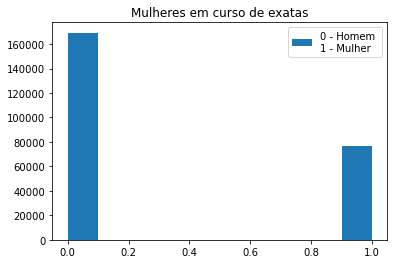

In [21]:
plt.hist(curso_exatas['TP_SEXO_B'], label = '0 - Homem \n1 - Mulher')
plt.title('Mulheres em curso de exatas')
plt.legend();

In [22]:
# fazendo o teste de hipótese para uma distribuição binomial, sendo que a hipótese nula é de que homens e mulheres tem a mesma
# proporção em cursos de exatas e a alternativa é de que existem menos mulheres em cursos de exatas, ou seja, um teste unicaudal
scipy.stats.binom_test(77177, n=(168860+77177), p=0.5, alternative='less')

0.0

A hipótese nula de que não existe diferença na presença de homens e mulheres em cursos na área de exatas é rejeitada com um nível de confiança de 95%, ja que o p value do teste é menor que 5% ou 0,05 e a hipótese alternativa, de que existem menos mulheres em cursos de exatas é aceita.

# 3) Quantos cursos novos abrem por ano? 

In [23]:
df_curso_completo

,CO_IES,CO_UF,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,DT_INICIO_FUNCIONAMENTO,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região
0,789,14.0,1259131,1.0,14.0,146.0,146F20,23/09/2013,2017.0,Educação,Formação de professor e ciências da educação,Formação de professor de disciplinas profissio...,Formação de professor de música,Roraima,RR,Norte
1,4567,51.0,1258115,3.0,34.0,345.0,345G09,25/01/2016,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Gestão de pessoal / recursos humanos,Mato Grosso,MT,Centro-Oeste
2,2341,35.0,68433,3.0,38.0,380.0,380D01,16/02/2004,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,São Paulo,SP,Sudeste
3,670,35.0,52052,5.0,52.0,522.0,522E06,01/08/2001,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Eletricidade e energia,Engenharia elétrica,São Paulo,SP,Sudeste
4,403,53.0,18061,3.0,38.0,380.0,380D01,17/02/1997,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Distrito Federal,DF,Centro-Oeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35688,15520,50.0,1327495,6.0,62.0,621.0,621A04,20/05/2015,2017.0,Agricultura e veterinária,"Agricultura, florestas e recursos pesqueiros",Produção agrícola e pecuária,Agronomia,Mato Grosso do Sul,MS,Centro-Oeste
35689,415,35.0,1192068,5.0,52.0,523.0,523M01,09/01/2015,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Eletrônica e automação,Manutenção de aparelhos médico-hospitalares,São Paulo,SP,Sudeste
35690,1672,15.0,104536,7.0,72.0,727.0,727F01,01/08/2007,2017.0,Saúde e bem estar social,Saúde,Farmácia,Farmácia,Pará,PA,Norte
35691,7,35.0,1305952,2.0,22.0,223.0,223L01,01/09/2014,2017.0,Humanidades e artes,Humanidades e letras,Língua materna (vernácula),Língua/literatura vernácula (português),São Paulo,SP,Sudeste


In [24]:
df_curso_completo['DT_INICIO_FUNCIONAMENTO'] = df_curso_completo['DT_INICIO_FUNCIONAMENTO'].astype('str')

In [25]:
df_curso_completo['ANO_FUNC'] = df_curso_completo['DT_INICIO_FUNCIONAMENTO'].apply(lambda x: x[-4:])
df_curso_completo

,CO_IES,CO_UF,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,DT_INICIO_FUNCIONAMENTO,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,ANO_FUNC
0,789,14.0,1259131,1.0,14.0,146.0,146F20,23/09/2013,2017.0,Educação,Formação de professor e ciências da educação,Formação de professor de disciplinas profissio...,Formação de professor de música,Roraima,RR,Norte,2013
1,4567,51.0,1258115,3.0,34.0,345.0,345G09,25/01/2016,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Gestão de pessoal / recursos humanos,Mato Grosso,MT,Centro-Oeste,2016
2,2341,35.0,68433,3.0,38.0,380.0,380D01,16/02/2004,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,São Paulo,SP,Sudeste,2004
3,670,35.0,52052,5.0,52.0,522.0,522E06,01/08/2001,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Eletricidade e energia,Engenharia elétrica,São Paulo,SP,Sudeste,2001
4,403,53.0,18061,3.0,38.0,380.0,380D01,17/02/1997,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Distrito Federal,DF,Centro-Oeste,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35688,15520,50.0,1327495,6.0,62.0,621.0,621A04,20/05/2015,2017.0,Agricultura e veterinária,"Agricultura, florestas e recursos pesqueiros",Produção agrícola e pecuária,Agronomia,Mato Grosso do Sul,MS,Centro-Oeste,2015
35689,415,35.0,1192068,5.0,52.0,523.0,523M01,09/01/2015,2017.0,"Engenharia, produção e construção",Engenharia e profissões correlatas,Eletrônica e automação,Manutenção de aparelhos médico-hospitalares,São Paulo,SP,Sudeste,2015
35690,1672,15.0,104536,7.0,72.0,727.0,727F01,01/08/2007,2017.0,Saúde e bem estar social,Saúde,Farmácia,Farmácia,Pará,PA,Norte,2007
35691,7,35.0,1305952,2.0,22.0,223.0,223L01,01/09/2014,2017.0,Humanidades e artes,Humanidades e letras,Língua materna (vernácula),Língua/literatura vernácula (português),São Paulo,SP,Sudeste,2014


In [26]:
df_questao3 = df_curso_completo.copy()

In [27]:
questao3 = df_questao3.groupby(['ANO_FUNC'], as_index=False).agg({'CO_CURSO': 'count'})
questao3 = questao3[questao3.ANO_FUNC != 'nan']
questao3['ANO_FUNC'] = questao3['ANO_FUNC'].astype('int')
questao3 = questao3[questao3['ANO_FUNC']>1999]
questao3 = questao3.drop(questao3.index[19])
questao3


,ANO_FUNC,CO_CURSO
116,2000,932
117,2001,1021
118,2002,1195
119,2003,1123
120,2004,1303
...,...,...
130,2014,1872
131,2015,1946
132,2016,1713
133,2017,949


# 4) Se usarmos a taxa de concluientes de um curso como variável de dificuldade dos cursos, eles tem ficado mais faceis ou mais duros ao longo do tempo? Quais as dificuldades para uma afirmação dessas?

In [28]:
df_aluno_completo

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública


In [29]:
df_questao4 = df_aluno_completo[['CO_CURSO', 'CO_ALUNO', 'NU_ANO_INGRESSO', 'IN_CONCLUINTE']]
df_questao4

,CO_CURSO,CO_ALUNO,NU_ANO_INGRESSO,IN_CONCLUINTE
0,1,400000319564,2017,0
1,1,400001597441,2015,0
2,1,400003623528,2017,0
3,1,400004288779,2017,0
4,1,400008507432,2017,0
...,...,...,...,...
1199995,5001415,400012920615,2017,0
1199996,5001415,400013685546,2017,0
1199997,5001415,400025481543,2017,0
1199998,5001415,400025494552,2017,0


In [30]:
teste = df_questao4.groupby(['CO_CURSO', 'NU_ANO_INGRESSO'], as_index=False).agg({'IN_CONCLUINTE': 'mean', 'CO_ALUNO': 'count'}) #rodar depois
teste

,CO_CURSO,NU_ANO_INGRESSO,IN_CONCLUINTE,CO_ALUNO
0,1,2010,0.000000,1
1,1,2012,0.333333,3
2,1,2013,0.333333,6
3,1,2014,0.000000,10
4,1,2015,0.000000,6
...,...,...,...,...
164252,5001397,2017,0.000000,13
164253,5001406,2017,0.000000,4
164254,5001408,2016,0.000000,7
164255,5001408,2017,0.000000,15


In [31]:
teste2 = teste[teste['CO_ALUNO']>10]
teste2 = teste2[teste2['NU_ANO_INGRESSO']>2000]
teste2 = teste2.round(2)
teste2


,CO_CURSO,NU_ANO_INGRESSO,IN_CONCLUINTE,CO_ALUNO
5,1,2016,0.00,12
6,1,2017,0.00,16
12,2,2014,0.29,17
28,6,2014,0.50,22
31,6,2017,0.00,11
...,...,...,...,...
164246,5001384,2017,0.00,34
164247,5001385,2017,0.24,21
164251,5001394,2017,0.00,15
164252,5001397,2017,0.00,13


In [32]:
teste3 = teste2.groupby(['CO_CURSO', 'NU_ANO_INGRESSO']).agg({'IN_CONCLUINTE': list})
teste3.unstack()

IN_CONCLUINTE                                                \
NU_ANO_INGRESSO          2002 2006 2007 2008 2009 2010 2011    2012    2013   
CO_CURSO                                                                      
1                         NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
2                         NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
6                         NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
9                         NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
12                        NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
...                       ...  ...  ...  ...  ...  ...  ...     ...     ...   
5001384                   NaN  NaN  NaN  NaN  NaN  NaN  NaN  [0.23]  [0.39]   
5001385                   NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
5001394                   NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
5001397                   NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   
5001408                   NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN   

                                                
NU_ANO_INGRESSO    2014    2015   2016    2017  
CO_CURSO                                        
1                   NaN     NaN  [0.0]   [0.0]  
2                [0.29]     NaN    NaN     NaN  
6                 [0.5]     NaN    NaN   [0.0]  
9                   NaN     NaN  [0.0]     NaN  
12               [0.14]     NaN    NaN     NaN  
...                 ...     ...    ...     ...  
5001384          [0.05]  [0.02]  [0.0]   [0.0]  
5001385             NaN     NaN    NaN  [0.24]  
5001394             NaN     NaN    NaN   [0.0]  
5001397             NaN     NaN    NaN   [0.0]  
5001408             NaN     NaN    NaN   [0.0]  

[10306 rows x 13 columns]

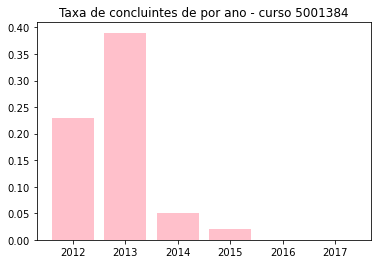

In [33]:
cond1 = teste2['CO_CURSO'] == 5001384
df_graph1 = teste2.loc[(cond1)]
fig, ax = plt.subplots(1,1)
x = df_graph1['NU_ANO_INGRESSO']
y = df_graph1['IN_CONCLUINTE']
plt.title('Taxa de concluintes de por ano - curso 5001384')
plt.bar(x,y, color = 'pink');

# 5) Rode uma regressão multipla que explique o abandono dos cursos, será que professores mais/menos preparados influência nessas taxas?

In [34]:
# calculando uma média de instrução para os docentes de cada IES
docente_ies = df_docente.groupby(['CO_IES'])
media_docente = docente_ies.agg({'TP_ESCOLARIDADE': 'mean'})
media_docente.reset_index(inplace = True)
media_docente

,CO_IES,TP_ESCOLARIDADE
0,1,4.351706
1,2,4.819184
2,3,4.532378
3,4,4.247676
4,5,4.358402
...,...,...
2443,21713,4.142857
2444,22093,3.833333
2445,22096,4.789474
2446,22319,4.250000


In [35]:
df_aluno_5 = pd.read_csv('DM_ALUNO.csv', sep="|", skiprows = skip, encoding = "latin1") 
df_aluno_5

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2017,1,1,1,1,NaN,3.0,1.0,1,...,NaN,NaN,NaN,1,0,1,0,NaN,2017
1,2017,1,1,1,1,NaN,3.0,1.0,1,...,NaN,NaN,NaN,1,0,0,0,NaN,2015
2,2017,1,1,1,1,NaN,1.0,1.0,1,...,NaN,NaN,NaN,1,0,1,1,NaN,2017
3,2017,1,1,1,1,NaN,3.0,1.0,1,...,NaN,NaN,NaN,1,0,1,0,NaN,2017
4,2017,1,1,1,1,NaN,3.0,1.0,1,...,NaN,NaN,NaN,1,0,1,1,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,2017,22939,2,3,5001415,NaN,3.0,3.0,1,...,NaN,NaN,NaN,0,0,1,1,NaN,2017
1199996,2017,22939,2,3,5001415,NaN,3.0,3.0,1,...,NaN,NaN,NaN,1,0,1,1,NaN,2017
1199997,2017,22939,2,3,5001415,NaN,3.0,3.0,1,...,NaN,NaN,NaN,1,0,1,1,NaN,2017
1199998,2017,22939,2,3,5001415,NaN,3.0,3.0,1,...,NaN,NaN,NaN,1,0,1,1,NaN,2017


In [36]:
df_aluno_5 = pd.merge(df_aluno_5, media_docente, how='left')

In [37]:
df_aluno_5.corr().round(2)['TP_SITUACAO'].sort_values(ascending=False)

TP_SITUACAO                      1.00
IN_CONCLUINTE                    0.81
QT_CARGA_HORARIA_INTEG           0.26
IN_APOIO_MATERIAL_DIDATICO       0.19
CO_IES_DESTINO                   0.16
                                 ... 
IN_INGRESSO_OUTRA_FORMA           NaN
IN_FIN_REEMB_OUTRA                NaN
IN_FIN_NAOREEMB_OUTRA             NaN
TP_SEMESTRE_CONCLUSAO             NaN
IN_INGRESSO_PROCESSO_SELETIVO     NaN
Name: TP_SITUACAO, Length: 107, dtype: float64

In [38]:
teste_questao5 = df_aluno_5[['CO_IES', 'TP_SITUACAO', 'IN_CONCLUINTE', 'QT_CARGA_HORARIA_INTEG', 'TP_MOBILIDADE_ACADEMICA_INTERN', 'IN_APOIO_SOCIAL', 'IN_INGRESSO_TOTAL', 'TP_ESCOLARIDADE']]
teste_questao5

,CO_IES,TP_SITUACAO,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_MOBILIDADE_ACADEMICA_INTERN,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TP_ESCOLARIDADE
0,1,2,0,2160,NaN,0,1,4.351706
1,1,2,0,1920,NaN,0,0,4.351706
2,1,2,0,420,NaN,0,1,4.351706
3,1,2,0,1500,NaN,0,1,4.351706
4,1,2,0,1320,NaN,0,1,4.351706
...,...,...,...,...,...,...,...,...
1199995,22939,3,0,433,NaN,0,1,4.500000
1199996,22939,2,0,400,NaN,0,1,4.500000
1199997,22939,2,0,400,NaN,0,1,4.500000
1199998,22939,2,0,400,NaN,0,1,4.500000


In [39]:
lista_st = {2: 'normal', 3: 'abandono', 4: 'abandono', 5: 'abandono', 6: 'normal', 7: 'normal'}
lista_st2 = {'normal': 0, 'abandono': 1}
lista_st3 = {1: 'sim', 2: 'sim'}
lista_st4 = {'sim': 1}
teste_questao5['situacao'] = teste_questao5['TP_SITUACAO'].map(lista_st)
teste_questao5['TX_ABANDONO'] = teste_questao5['situacao'].map(lista_st2)
teste_questao5['intercambio'] = teste_questao5['TP_MOBILIDADE_ACADEMICA_INTERN'].map(lista_st3)
teste_questao5['TX_INTERCAMBIO'] = teste_questao5['intercambio'].map(lista_st4)
teste_questao5

c:\users\alana\onedrive\área de trabalho\curso\programas\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\alana\onedrive\área de trabalho\curso\programas\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\alana\onedrive\área de trabalho\curso\programas\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,CO_IES,TP_SITUACAO,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_MOBILIDADE_ACADEMICA_INTERN,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TP_ESCOLARIDADE,situacao,TX_ABANDONO,intercambio,TX_INTERCAMBIO
0,1,2,0,2160,NaN,0,1,4.351706,normal,0,NaN,NaN
1,1,2,0,1920,NaN,0,0,4.351706,normal,0,NaN,NaN
2,1,2,0,420,NaN,0,1,4.351706,normal,0,NaN,NaN
3,1,2,0,1500,NaN,0,1,4.351706,normal,0,NaN,NaN
4,1,2,0,1320,NaN,0,1,4.351706,normal,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,3,0,433,NaN,0,1,4.500000,abandono,1,NaN,NaN
1199996,22939,2,0,400,NaN,0,1,4.500000,normal,0,NaN,NaN
1199997,22939,2,0,400,NaN,0,1,4.500000,normal,0,NaN,NaN
1199998,22939,2,0,400,NaN,0,1,4.500000,normal,0,NaN,NaN


In [40]:
questao5 = teste_questao5.groupby(['CO_IES'], as_index=False).agg({'IN_CONCLUINTE': 'mean', 'QT_CARGA_HORARIA_INTEG': 'mean', 'TP_ESCOLARIDADE': 'mean', 'TX_INTERCAMBIO': 'mean', 'IN_APOIO_SOCIAL': 'mean', 'IN_INGRESSO_TOTAL': 'mean', 'TX_ABANDONO': 'mean' })
questao5

,CO_IES,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_ESCOLARIDADE,TX_INTERCAMBIO,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TX_ABANDONO
0,1,0.069919,1331.330019,4.351706,1.0,0.082349,0.224363,0.305158
1,2,0.106862,1086.198215,4.819184,1.0,0.137667,0.210537,0.193117
2,3,0.097276,1487.626459,4.532378,NaN,0.076624,0.184077,0.177492
3,4,0.106182,1593.113623,4.247676,NaN,0.074127,0.189468,0.101317
4,5,0.079019,1351.884383,4.358402,1.0,0.076939,0.305469,0.261593
...,...,...,...,...,...,...,...,...
2427,21713,0.000000,650.136364,4.142857,NaN,0.000000,0.500000,0.318182
2428,22093,0.000000,576.000000,3.833333,NaN,0.000000,1.000000,0.000000
2429,22096,0.000000,760.000000,4.789474,NaN,0.200000,1.000000,0.200000
2430,22319,0.000000,498.227273,4.250000,NaN,0.000000,0.681818,0.181818


In [41]:
questao5 = questao5.fillna(0)


In [42]:
questao5['TX_INTERCAMBIO_DUMMY'] = questao5['TX_INTERCAMBIO'].apply(lambda x: 1 if x>0.5 else 0)
questao5 = pd.get_dummies(questao5, columns =['TX_INTERCAMBIO_DUMMY'])
questao5

,CO_IES,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_ESCOLARIDADE,TX_INTERCAMBIO,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TX_ABANDONO,TX_INTERCAMBIO_DUMMY_0,TX_INTERCAMBIO_DUMMY_1
0,1,0.069919,1331.330019,4.351706,1.0,0.082349,0.224363,0.305158,0,1
1,2,0.106862,1086.198215,4.819184,1.0,0.137667,0.210537,0.193117,0,1
2,3,0.097276,1487.626459,4.532378,0.0,0.076624,0.184077,0.177492,1,0
3,4,0.106182,1593.113623,4.247676,0.0,0.074127,0.189468,0.101317,1,0
4,5,0.079019,1351.884383,4.358402,1.0,0.076939,0.305469,0.261593,0,1
...,...,...,...,...,...,...,...,...,...,...
2427,21713,0.000000,650.136364,4.142857,0.0,0.000000,0.500000,0.318182,1,0
2428,22093,0.000000,576.000000,3.833333,0.0,0.000000,1.000000,0.000000,1,0
2429,22096,0.000000,760.000000,4.789474,0.0,0.200000,1.000000,0.200000,1,0
2430,22319,0.000000,498.227273,4.250000,0.0,0.000000,0.681818,0.181818,1,0


In [43]:
questao5['TX_ABANDONO_LOG'] = np.log1p(questao5['TX_ABANDONO'])
questao5['IN_APOIO_SOCIAL_LOG'] = np.log1p(questao5['IN_APOIO_SOCIAL'])
questao5['TP_ESCOLARIDADE_LOG'] = np.log1p(questao5['TP_ESCOLARIDADE'])
questao5['IN_INGRESSO_TOTAL_LOG'] = np.log1p(questao5['IN_INGRESSO_TOTAL'])
questao5['QT_CARGA_HORARIA_INTEG_LOG'] = np.log1p(questao5['QT_CARGA_HORARIA_INTEG'])
questao5['IN_CONCLUINTE_LOG'] = np.log1p(questao5['IN_CONCLUINTE'])
questao5

,CO_IES,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_ESCOLARIDADE,TX_INTERCAMBIO,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TX_ABANDONO,TX_INTERCAMBIO_DUMMY_0,TX_INTERCAMBIO_DUMMY_1,TX_ABANDONO_LOG,IN_APOIO_SOCIAL_LOG,TP_ESCOLARIDADE_LOG,IN_INGRESSO_TOTAL_LOG,QT_CARGA_HORARIA_INTEG_LOG,IN_CONCLUINTE_LOG
0,1,0.069919,1331.330019,4.351706,1.0,0.082349,0.224363,0.305158,0,1,0.266324,0.079134,1.677415,0.202421,7.194685,0.067583
1,2,0.106862,1086.198215,4.819184,1.0,0.137667,0.210537,0.193117,0,1,0.176569,0.128980,1.761160,0.191064,6.991359,0.101529
2,3,0.097276,1487.626459,4.532378,0.0,0.076624,0.184077,0.177492,1,0,0.163387,0.073830,1.710618,0.168963,7.305609,0.092831
3,4,0.106182,1593.113623,4.247676,0.0,0.074127,0.189468,0.101317,1,0,0.096506,0.071508,1.657785,0.173506,7.374073,0.100914
4,5,0.079019,1351.884383,4.358402,1.0,0.076939,0.305469,0.261593,0,1,0.232375,0.074123,1.678666,0.266562,7.209994,0.076052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,21713,0.000000,650.136364,4.142857,0.0,0.000000,0.500000,0.318182,1,0,0.276253,0.000000,1.637609,0.405465,6.478719,0.000000
2428,22093,0.000000,576.000000,3.833333,0.0,0.000000,1.000000,0.000000,1,0,0.000000,0.000000,1.575536,0.693147,6.357842,0.000000
2429,22096,0.000000,760.000000,4.789474,0.0,0.200000,1.000000,0.200000,1,0,0.182322,0.182322,1.756041,0.693147,6.634633,0.000000
2430,22319,0.000000,498.227273,4.250000,0.0,0.000000,0.681818,0.181818,1,0,0.167054,0.000000,1.658228,0.519875,6.213061,0.000000


In [44]:
questao5.corr()

,CO_IES,IN_CONCLUINTE,QT_CARGA_HORARIA_INTEG,TP_ESCOLARIDADE,TX_INTERCAMBIO,IN_APOIO_SOCIAL,IN_INGRESSO_TOTAL,TX_ABANDONO,TX_INTERCAMBIO_DUMMY_0,TX_INTERCAMBIO_DUMMY_1,TX_ABANDONO_LOG,IN_APOIO_SOCIAL_LOG,TP_ESCOLARIDADE_LOG,IN_INGRESSO_TOTAL_LOG,QT_CARGA_HORARIA_INTEG_LOG,IN_CONCLUINTE_LOG
CO_IES,1.000000,-0.187812,-0.398283,-0.063328,-0.160786,0.012802,0.514882,-0.101748,0.160786,-0.160786,-0.120572,0.008036,-0.067375,0.483627,-0.367715,-0.229947
IN_CONCLUINTE,-0.187812,1.000000,0.496517,-0.086004,-0.024321,-0.040549,-0.355591,-0.170971,0.024321,-0.024321,-0.174929,-0.042829,-0.085943,-0.366794,0.361079,0.992459
QT_CARGA_HORARIA_INTEG,-0.398283,0.496517,1.000000,0.019598,0.055117,-0.031866,-0.564770,-0.219199,-0.055117,0.055117,-0.219214,-0.031348,0.021113,-0.562895,0.735230,0.523647
TP_ESCOLARIDADE,-0.063328,-0.086004,0.019598,1.000000,0.335027,0.119061,-0.046773,-0.018662,-0.335027,0.335027,-0.013955,0.132078,0.998400,-0.038869,0.040541,-0.077608
TX_INTERCAMBIO,-0.160786,-0.024321,0.055117,0.335027,1.000000,0.115965,-0.082830,-0.051734,-1.000000,1.000000,-0.046805,0.133231,0.322472,-0.077678,0.060518,-0.017052
IN_APOIO_SOCIAL,0.012802,-0.040549,-0.031866,0.119061,0.115965,1.000000,0.019478,-0.070476,-0.115965,0.115965,-0.072175,0.995682,0.115471,0.019740,-0.032496,-0.040279
IN_INGRESSO_TOTAL,0.514882,-0.355591,-0.564770,-0.046773,-0.082830,0.019478,1.000000,-0.232970,0.082830,-0.082830,-0.241823,0.013666,-0.048277,0.993281,-0.517355,-0.389001
TX_ABANDONO,-0.101748,-0.170971,-0.219199,-0.018662,-0.051734,-0.070476,-0.232970,1.000000,0.051734,-0.051734,0.995093,-0.072047,-0.018457,-0.236058,-0.050631,-0.163385
TX_INTERCAMBIO_DUMMY_0,0.160786,0.024321,-0.055117,-0.335027,-1.000000,-0.115965,0.082830,0.051734,1.000000,-1.000000,0.046805,-0.133231,-0.322472,0.077678,-0.060518,0.017052
TX_INTERCAMBIO_DUMMY_1,-0.160786,-0.024321,0.055117,0.335027,1.000000,0.115965,-0.082830,-0.051734,-1.000000,1.000000,-0.046805,0.133231,0.322472,-0.077678,0.060518,-0.017052


In [45]:
regressao5 = questao5[['TX_ABANDONO_LOG', 'IN_APOIO_SOCIAL_LOG', 'TP_ESCOLARIDADE_LOG', 'IN_INGRESSO_TOTAL_LOG', 'QT_CARGA_HORARIA_INTEG_LOG', 'IN_CONCLUINTE_LOG', 'TX_INTERCAMBIO_DUMMY_0', 'TX_INTERCAMBIO_DUMMY_1']]
regressao5

,TX_ABANDONO_LOG,IN_APOIO_SOCIAL_LOG,TP_ESCOLARIDADE_LOG,IN_INGRESSO_TOTAL_LOG,QT_CARGA_HORARIA_INTEG_LOG,IN_CONCLUINTE_LOG,TX_INTERCAMBIO_DUMMY_0,TX_INTERCAMBIO_DUMMY_1
0,0.266324,0.079134,1.677415,0.202421,7.194685,0.067583,0,1
1,0.176569,0.128980,1.761160,0.191064,6.991359,0.101529,0,1
2,0.163387,0.073830,1.710618,0.168963,7.305609,0.092831,1,0
3,0.096506,0.071508,1.657785,0.173506,7.374073,0.100914,1,0
4,0.232375,0.074123,1.678666,0.266562,7.209994,0.076052,0,1
...,...,...,...,...,...,...,...,...
2427,0.276253,0.000000,1.637609,0.405465,6.478719,0.000000,1,0
2428,0.000000,0.000000,1.575536,0.693147,6.357842,0.000000,1,0
2429,0.182322,0.182322,1.756041,0.693147,6.634633,0.000000,1,0
2430,0.167054,0.000000,1.658228,0.519875,6.213061,0.000000,1,0


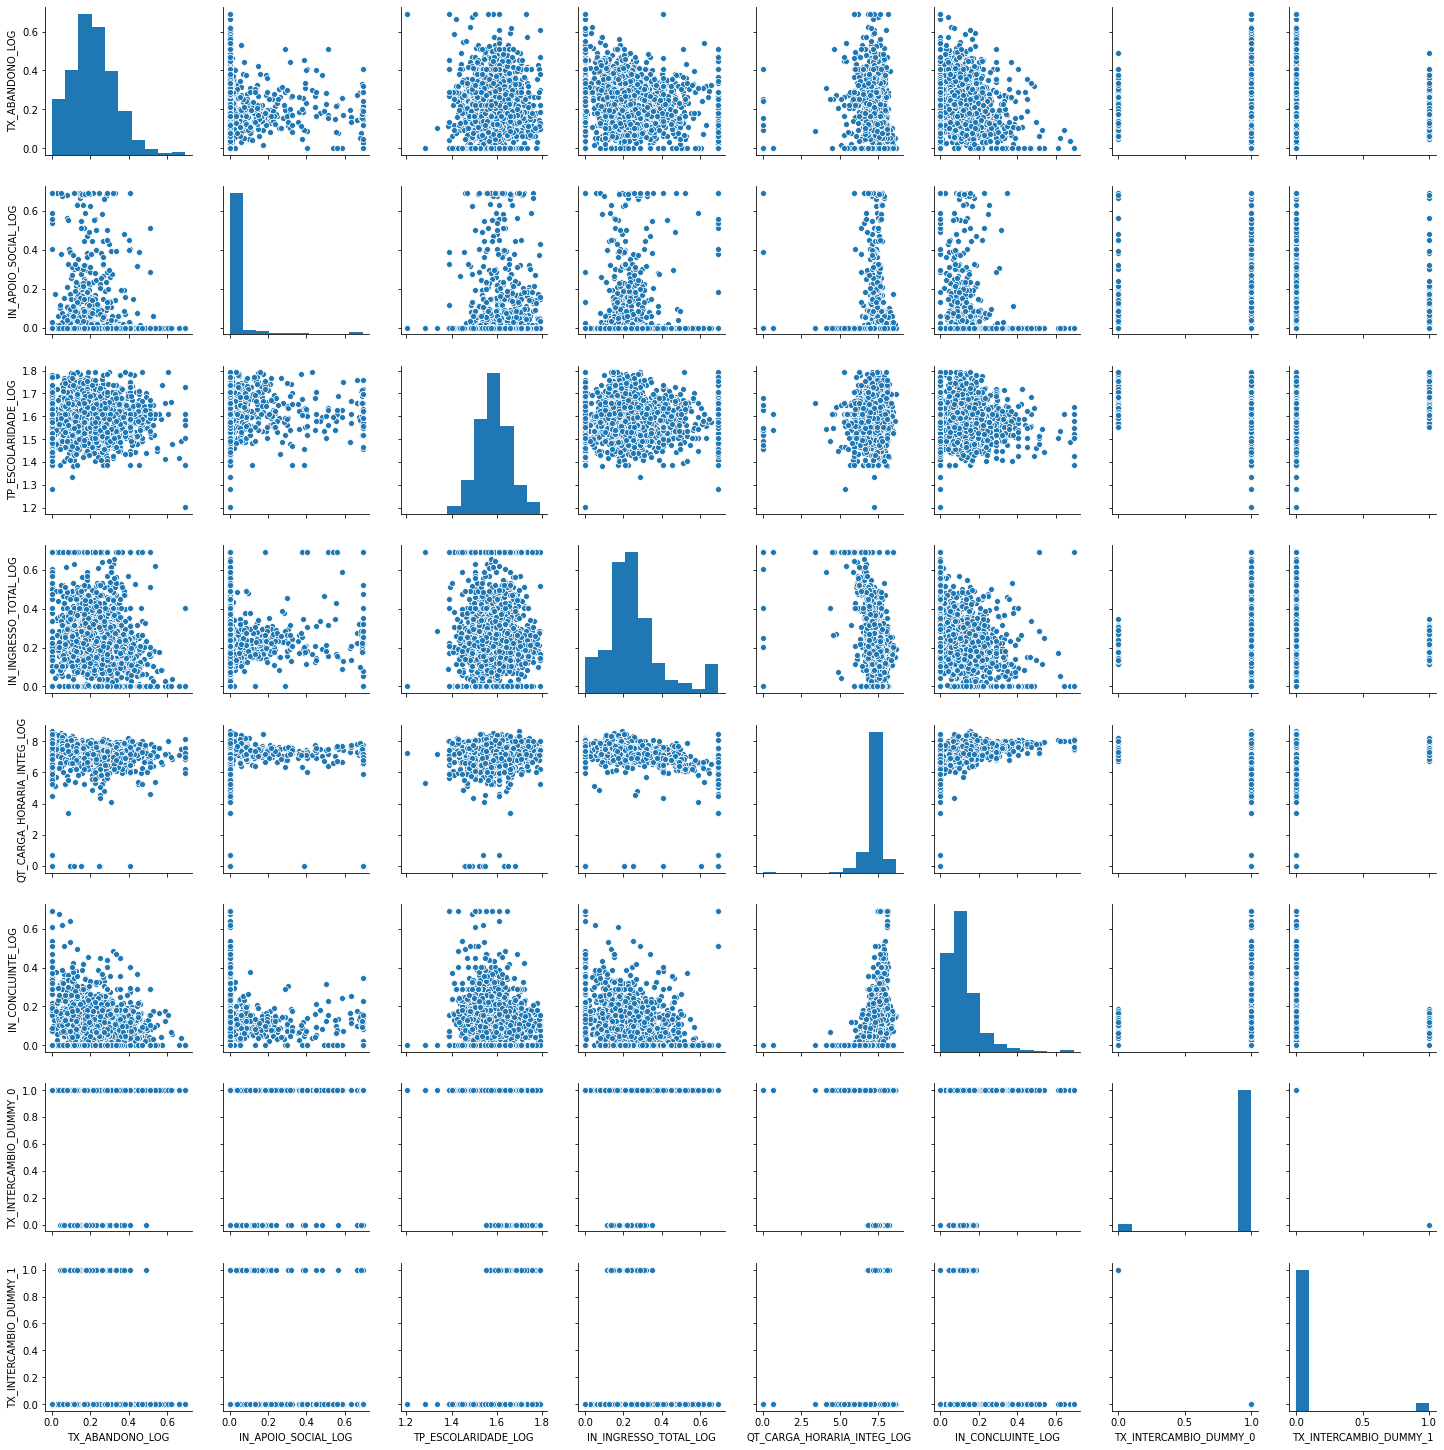

In [46]:
sns.pairplot(data=regressao5)

In [47]:
#rodando a regressão

function = 'TX_ABANDONO_LOG ~ IN_APOIO_SOCIAL_LOG + IN_INGRESSO_TOTAL_LOG + QT_CARGA_HORARIA_INTEG_LOG + IN_CONCLUINTE_LOG + TP_ESCOLARIDADE_LOG + TX_INTERCAMBIO_DUMMY_0 + TX_INTERCAMBIO_DUMMY_1'
model = smf.ols(formula=function, data=regressao5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TX_ABANDONO_LOG   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     77.96
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           2.59e-89
Time:                        11:45:28   Log-Likelihood:                 1992.1
No. Observations:                2432   AIC:                            -3970.
Df Residuals:                    2425   BIC:                            -3930.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3487      0.039      8.913      0.000       0.272       0.425
IN_APOIO_SOCIAL_LOG           -0.0771      0.020     -3.852      0.000      -0.116      -0.038
IN_INGRESSO_TOTAL_LOG         -0.3244      0.017    -19.080      0.000      -0.358      -0.291
QT_CARGA_HORARIA_INTEG_LOG    -0.0215      0.004     -6.039      0.000      -0.028      -0.014
IN_CONCLUINTE_LOG             -0.3493      0.026    -13.507      0.000      -0.400      -0.299
TP_ESCOLARIDADE_LOG           -0.0270      0.032     -0.839      0.402      -0.090       0.036
TX_INTERCAMBIO_DUMMY_0         0.1907      0.018     10.374      0.000       0.155       0.227
TX_INTERCAMBIO_DUMMY_1         0.1580      0.022      7.192      0.000       0.115       0.201
==============================================================================
Omnibus:                       56.644   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.175
Skew:                           0.209   Prob(JB):                     9.65e-21
Kurtosis:                       3.857   Cond. No.                     3.35e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 6) Quais os cursos com maior crescimento de matriculas por região? E quais os com maior queda? Como você explicaria isso.

In [48]:
df_aluno_completo

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,...,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,...,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,...,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública


In [49]:
df_questao6 =df_aluno_completo.copy()
questao6 = df_questao6[df_questao6['NU_ANO_INGRESSO']>2000]
questao6 = questao6.groupby(['Região', 'NO_OCDE'])['IN_MATRICULA'].agg(['sum', 'count']).reset_index([0,1])
questao6['tx_matricula'] = questao6['sum'] / questao6['count']
questao6.sort_values(by=['Região','sum','tx_matricula'],ascending=False, inplace=True)
questao6 = questao6[questao6['count']>100]
questao6

,Região,NO_OCDE,sum,count,tx_matricula
946,Sul,Direito,14314,19171,0.746649
886,Sul,Administração,8352,12502,0.668053
961,Sul,Engenharia civil,5099,6917,0.737169
928,Sul,Ciências contábeis,4240,5895,0.719254
1089,Sul,Psicologia,4044,5486,0.737149
...,...,...,...,...,...
153,Centro-Oeste,Relações públicas,80,102,0.784314
32,Centro-Oeste,Ciências sociais,80,136,0.588235
182,Centro-Oeste,Uso da internet,75,103,0.728155
164,Centro-Oeste,Tecnologia de alimentos,66,105,0.628571


In [50]:
maiores = []
menores = []
for reg in questao6['Região'].unique():
    t = questao6.loc[questao6['Região']==reg]
    M = t.nlargest (5, columns=['tx_matricula'])
    m = t.nsmallest(5, columns=['tx_matricula'])
    maiores.append(M)
    menores.append(m)
lista1 = pd.concat(maiores).sort_values(by=['Região','tx_matricula'], ascending = False)
lista2 = pd.concat(menores).sort_values(by=['Região','tx_matricula'], ascending = False)


In [53]:
pd.set_option("display.max_rows", 25)
lista1

,Região,NO_OCDE,sum,count,tx_matricula
1066,Sul,Medicina,2249,2344,0.959471
1078,Sul,Odontologia,1551,1787,0.867935
975,Sul,Engenharia florestal,225,273,0.824176
1133,Sul,Zootecnia,340,413,0.823245
898,Sul,Agronomia,2627,3220,0.815839
798,Sudeste,Medicina,7402,7791,0.950071
747,Sudeste,Formação de professor para a educação básica,108,117,0.923077
637,Sudeste,Ciência militar,154,168,0.916667
682,Sudeste,Engenharia de alimentos,612,694,0.881844
673,Sudeste,Engenharia aeroespacial,90,103,0.873786


In [54]:
pd.set_option("display.max_rows", 25)
lista2

,Região,NO_OCDE,sum,count,tx_matricula
1122,Sul,Tecnologia mecatrônica,65,114,0.570175
1131,Sul,Turismo,141,249,0.566265
1041,Sul,Gestão de qualidade,122,219,0.557078
994,Sul,Filosofia,90,176,0.511364
1119,Sul,Tecnologia em desenvolvimento de softwares,127,252,0.503968
671,Sudeste,Engenharia,128,226,0.566372
709,Sudeste,Eventos,188,333,0.564565
749,Sudeste,Fotografia,249,467,0.533191
851,Sudeste,Sociologia,61,121,0.504132
839,Sudeste,Saúde e segurança no trabalho,54,112,0.482143


# 7) Construa uma variável "Signo" dos estudantes e explique porque ela é correlacionada com a variável "probabilidade de formação" (construir)

In [120]:
idx = pd.date_range('2018-01-01', periods=365, freq='D')
ts = pd.Series(range(len(idx)), index=idx)
teste7 = pd.DataFrame(ts)
teste7 = datas.reset_index()
teste7 = datas.rename(columns={'index':'anomesdia'})
teste7 = datas.rename(columns={'0':'fora'})
teste7['anomesdia'] = teste7['anomesdia'].astype('str')

In [226]:
signos = []
cap = 'Capricornio'
aq = 'Aquario'
pe = 'Peixes'
ar = 'Aries'
to = 'Touro'
ge = 'Gemeos'
ca = 'Cancer'
le = 'Leao'
vi = 'Virgem'
li = 'Libra'
es = 'Escorpiao'
sa = 'Sagitario'

for x in teste7['anomesdia']:
    if x > '01-01' and x < '01-21':
        signos.append(cap)
    elif x > '01-21'and x < '02-20':
        signos.append(aq)
    elif x > '02-19' and x < '03-21':
        signos.append(pe)
    elif x > '03-20' and x < '04-21':
        signos.append(ar)
    elif x > '04-20' and x < '05-21':
        signos.append(to)
    elif x > '05-20' and x < '06-21':
        signos.append(ge)
    elif x > '06-20' and x < '07-22':
        signos.append(ca)
    elif x > '07-21' and x < '08-23':
        signos.append(le)
    elif x > '08-22' and x < '09-23':
        signos.append(vi)
    elif x > '09-22' and x < '10-23':
        signos.append(li)
    elif x > '10-22' and x < '11-22':
        signos.append(es)
    elif x > '11-21' and x < '12-22':
        signos.append(sa)
    else:
        signos.append(cap)
teste7['signo'] = signos    
teste7['anomesdia'] = teste7['anomesdia'].apply(lambda x: x[-5:])
teste7 = teste7[['anomesdia', 'signo']]
teste7 = pd.DataFrame(teste7)
teste7.nunique()

anomesdia    365
signo         12
dtype: int64

In [224]:
df_aluno7 = df_aluno_completo.copy()
df_aluno7['NU_ANO_NASCIMENTO'] = df_aluno7['NU_ANO_NASCIMENTO'].astype('str')
df_aluno7['NU_MES_NASCIMENTO'] = df_aluno7['NU_MES_NASCIMENTO'].astype('str')
df_aluno7['NU_DIA_NASCIMENTO'] = df_aluno7['NU_DIA_NASCIMENTO'].astype('str')
df_aluno7['data_nasc'] = df_aluno7['NU_ANO_NASCIMENTO']+'-'+df_aluno7['NU_MES_NASCIMENTO']+'-'+df_aluno7['NU_DIA_NASCIMENTO']
df_aluno7['data_nasc'] = pd.to_datetime(df_aluno7['data_nasc'])
df_aluno7['data_nasc'] = df_aluno7['data_nasc'].astype('str')
df_aluno7['data_signo'] = df_aluno7['data_nasc'].apply(lambda x: x[-5:])
df_aluno7 = pd.merge(df_aluno7, teste7, how='left', left_on=['data_signo'] , right_on=['anomesdia'])
df_aluno7

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,CO_OCDE_AREA_GERAL,CO_OCDE_AREA_ESPECIFICA,CO_OCDE_AREA_DETALHADA,CO_OCDE,CO_ALUNO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,TP_SITUACAO,IN_APOIO_SOCIAL,IN_BOLSA_ESTAGIO,IN_MATRICULA,IN_CONCLUINTE,NU_ANO_INGRESSO,CO_UF,DT_INICIO_FUNCIONAMENTO,NU_ANO_CENSO,NO_OCDE_AREA_GERAL,NO_OCDE_AREA_ESPECIFICA,NO_OCDE_AREA_DETALHADA,NO_OCDE,NOME_UF,UF,Região,Pub/Priv,diames,data_nasc,data_signo,anomesdia,signo
0,1,1,1,3.0,38.0,380.0,380D01,400000319564,1,1992,9,30,2,0,NaN,1,0,2017,51.0,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública,39,1992-09-30,09-30,09-30,Libra
1,1,1,1,3.0,38.0,380.0,380D01,400001597441,2,1990,2,27,2,0,NaN,1,0,2015,51.0,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública,29,1990-02-27,02-27,02-27,Peixes
2,1,1,1,3.0,38.0,380.0,380D01,400003623528,1,1990,1,29,2,0,NaN,1,0,2017,51.0,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública,30,1990-01-29,01-29,01-29,Aquario
3,1,1,1,3.0,38.0,380.0,380D01,400004288779,1,1981,1,8,2,0,NaN,1,0,2017,51.0,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública,9,1981-01-08,01-08,01-08,Capricornio
4,1,1,1,3.0,38.0,380.0,380D01,400008507432,2,1985,3,25,2,0,NaN,1,0,2017,51.0,05/09/1952,2017.0,"Ciências sociais, negócios e direito",Direito,Direito,Direito,Mato Grosso,MT,Centro-Oeste,Pública,28,1985-03-25,03-25,03-25,Aries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,22939,2,5001415,3.0,34.0,345.0,345E01,400012920615,1,1993,4,1,3,0,NaN,0,0,2017,35.0,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública,5,1993-04-01,04-01,04-01,Aries
1199996,22939,2,5001415,3.0,34.0,345.0,345E01,400013685546,2,1990,4,25,2,0,NaN,1,0,2017,35.0,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública,29,1990-04-25,04-25,04-25,Touro
1199997,22939,2,5001415,3.0,34.0,345.0,345E01,400025481543,1,1980,2,1,2,0,NaN,1,0,2017,35.0,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública,3,1980-02-01,02-01,02-01,Aquario
1199998,22939,2,5001415,3.0,34.0,345.0,345E01,400025494552,1,1997,10,16,2,0,NaN,1,0,2017,35.0,NaN,2017.0,"Ciências sociais, negócios e direito",Comércio e administração,Gerenciamento e administração,Empreendedorismo,São Paulo,SP,Sudeste,Pública,26,1997-10-16,10-16,10-16,Libra


In [230]:
df_aluno7.drop(['diames','anomesdia'])
df_aluno7

KeyError: "['diames' 'anomesdia'] not found in axis"